<a href="https://colab.research.google.com/github/matheus-haruki/Processamento-de-Linguagem-Natural/blob/main/Aula_12_e_13_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula**

Introdução aos conceitos de Redes Neurais Recorrentes (RNNs) e Long Short-Term Memory Networks (LSTMs) e sua aplicação em tarefas de Processamento de Linguagem Natural

**Técnicas de PLN implementadas:**


· Implementar uma Rede Neural Recorrente (RNN) simples em Python para prever a próxima palavra em uma sequência de texto, utilizando a biblioteca TensorFlow/Keras.

· Implementar uma Rede Long Short-Term Memory (LSTM) em Python para classificar o sentimento de frases como "positivo" ou "negativo", utilizando a biblioteca TensorFlow/Keras.

**Passo a passo:**

Implementação 1: Modelo de Rede Neural de Recorrência



In [1]:
# Etapa 1: Configuração do ambiente no Google Colab

#Importar bibliotecas necessárias

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [2]:
# Etapa 2: Preparação do Comjunto de Dados

# Conjunto de dados de treinamento (pequeno e simplificado)
textos_treinamento = [
    "eu gosto de programar em python",
    "python é uma linguagem poderosa",
    "programar é divertido com python",
    "aprenda python e seja feliz",
    "gosto de aprender coisas novas"
]

print(f"Textos de treinamento: {textos_treinamento}")

Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programar é divertido com python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']


In [7]:
# Inicializar o Tokenizer
tokenizer = Tokenizer()

# Construir o vocabulário a partir dos textos
tokenizer.fit_on_texts(textos_treinamento)

# Converter textos em sequências de números
sequencias = tokenizer.texts_to_sequences(textos_treinamento)

# Imprimir o vocabulário e as sequências geradas
print(f"\nvocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas dos textos: {sequencias}")

# Calcular o tamanho do vocabulário (+1 para incluir o 0 de padding)
total_palavras = len(tokenizer.word_index) + 1
print(f"Tamanho total do vocabulário: {total_palavras}")


vocabulário (palavra: índice): {'python': 1, 'gosto': 2, 'de': 3, 'programar': 4, 'é': 5, 'eu': 6, 'em': 7, 'uma': 8, 'linguagem': 9, 'poderosa': 10, 'divertido': 11, 'com': 12, 'aprenda': 13, 'e': 14, 'seja': 15, 'feliz': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequências numéricas dos textos: [[6, 2, 3, 4, 7, 1], [1, 5, 8, 9, 10], [4, 5, 11, 12, 1], [13, 1, 14, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20


In [8]:
# Preparar Entradas (X) e Saídas (y) para a previsão da próxima palavra
# a entrada (X) será uma sequência de palavras, e a saída (y) será a palavra seguinte.
# Determinar o comprimento máximo das sequências para padding
max_comprimento = max(len(seq) for seq in sequencias)
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

# Criar pares de entrada (sequência parcial) e saída (próxima palavra)
# Ex: "eu gosto de programar" -> "em"
# "gosto de programar em" -> "python"
entradas_X = []
saídas_y = []

for seq in sequencias:
    for i in range(1, len(seq)):
        entradas_X.append(seq[:i])  # A sequência até a palavra atual
        saídas_y.append(seq[i])     # A próxima palavra

print(f"Exemplo de entradas_X (parcial): {entradas_X[0:5]}")
print(f"Exemplo de saídas_y (parcial): {saídas_y[0:5]}")

# Padronizar o comprimento das sequências de entrada
# Todas as sequências de entrada precisam ter o mesmo comprimento para a RNN
entradas_X_padded = pad_sequences(entradas_X, maxlen=max_comprimento - 1, padding='pre')
# O maxlen é 'max_comprimento - 1' porque a saída 'y' é a última palavra, então X sempre terá 1 palavra a menos.

# Converter as saídas para o formato one-hot encoding
# Isso é necessário para a camada de saída da RNN (softmax)
saídas_y_one_hot = tf.keras.utils.to_categorical(saídas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_X_padded (após padding e truncagem): \n{entradas_X_padded[0:5]}")
print(f"Exemplo de saídas_y_one_hot (após one-hot encoding): \n{saídas_y_one_hot[0:5]}")
print(f"Formato final das entradas (X): {entradas_X_padded.shape}")
print(f"Formato final das saídas (y): {saídas_y_one_hot.shape}")


Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_X (parcial): [[6], [6, 2], [6, 2, 3], [6, 2, 3, 4], [6, 2, 3, 4, 7]]
Exemplo de saídas_y (parcial): [2, 3, 4, 7, 1]

Exemplo de entradas_X_padded (após padding e truncagem): 
[[0 0 0 0 6]
 [0 0 0 6 2]
 [0 0 6 2 3]
 [0 6 2 3 4]
 [6 2 3 4 7]]
Exemplo de saídas_y_one_hot (após one-hot encoding): 
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Formato final das entradas (X): (21, 5)
Formato final das saídas (y): (21, 20)


In [9]:
# Etapa 3: Construção do Modelo RNN

# 1. Definindo o modelo
# Definir a arquitetura do modelo RNN
modelo_rnn = Sequential()

# Camada de Embedding:
# total_palavras: tamanho do vocabulário
# 10: dimensão do vetor de embedding (quantas características queremos para cada palavra)
# input_length: comprimento das sequências de entrada (maxlen - 1)
modelo_rnn.add(Embedding(total_palavras, 10, input_length=entradas_X_padded.shape[1]))

# Camada SimpleRNN:
# 32: número de unidades (neurônios) na camada recorrente. Este é o tamanho do estado oculto.
modelo_rnn.add(SimpleRNN(32))

# Camada Densa de Saída:
# total_palavras: número de neurônios de saída (um para cada palavra no vocabulário)
# activation='softmax': função de ativação para probabilidade (soma 1 para todas as palavras)
modelo_rnn.add(Dense(total_palavras, activation='softmax'))

# Compilar o modelo
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Etapa 4: Treinamento do Modelo

# Treinando o modelo
print("\nIniciando o treinamento do modelo RNN...")
modelo_rnn.fit(entradas_X_padded, saídas_y_one_hot, epochs=100, verbose=1)
   # epochs: quantas vezes o modelo verá todo o conjunto de dados
   # verbose: 1 para mostrar o progresso do treinamento
print("Treinamento concluído!")


Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.9824
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0476 - loss: 2.9748
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0000e+00 - loss: 2.9673
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 2.9596
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0476 - loss: 2.9518
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0952 - loss: 2.9437
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1905 - loss: 2.9355
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2381 - loss: 2.9269
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1905 - loss: 2.9181
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1429 - loss: 2.9089
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0952 - loss: 2.8993
Epoch 12/100
1/1 ━━━━━

In [13]:
# Etapa 5: Usar o modelo para previsão

# 1. Função de Previsão
def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
    """
    Prevê a próxima palavra dado um texto base.
    """
    # Converter o texto base para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]

    # Padronizar o comprimento da sequência de entrada (como no treinamento)
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='pre')

    # Fazer a previsão
    previsao_probabilidades = modelo.predict(sequencia_padded, verbose=0)[0]

    # Obter o índice da palavra com maior probabilidade
    indice_palavra_prevista = np.argmax(previsao_probabilidades)

    # Converter o índice de volta para a palavra
    for palavra, indice in tokenizer.word_index.items():
        if indice == indice_palavra_prevista:
            return palavra
    return None  # Caso a palavra não seja encontrada

# Comprimento de entrada esperado pelo modelo
comprimento_entrada_modelo = entradas_X_padded.shape[1]

# Testar o modelo com algumas frases
print("\n-- Testando o Modelo RNN --")

texto_teste_1 = "eu gosto de"
proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)
print(f"Texto: '{texto_teste_1}' -> Próxima palavra prevista: '{proxima_1}'")

texto_teste_2 = "python é uma"
proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)
print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: '{proxima_2}'")

texto_teste_3 = "programar é divertido"
proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)
print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: '{proxima_3}'")

texto_teste_4 = "aprenda python e"
proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)
print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: '{proxima_4}'")

# Exemplo com palavras fora do vocabulário
texto_teste_5 = "o sol brilha no"  # Palavras "sol" e "brilha" podem não estar no vocabulário
proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)
print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: '{proxima_5}' (pode ser inesperada devido a palavras desconhecidas)")



-- Testando o Modelo RNN --
Texto: 'eu gosto de' -> Próxima palavra prevista: 'programar'
Texto: 'python é uma' -> Próxima palavra prevista: 'linguagem'
Texto: 'programar é divertido' -> Próxima palavra prevista: 'com'
Texto: 'aprenda python e' -> Próxima palavra prevista: 'seja'
Texto: 'o sol brilha no' -> Próxima palavra prevista: 'é' (pode ser inesperada devido a palavras desconhecidas)


**Implementação 2: Modelo de Rede Neural Rede Long Short-Term Memory**

In [14]:
# Etapa 1: Configuração do Ambiente e Importação de Bibliotecas

# Important bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [16]:
# Etapa 2: Preparação do conjunto de dados e análise de sentimentos

# Definir o Conjunto de Dados (Frases e Rótulos) para análise de sentimentos
dados_sentimento = [
 ("este filme é ótimo e divertido", "positivo"),
 ("eu adorei o livro, muito bom", "positivo"),
 ("gostei muito da atuação dos atores", "positivo"),
 ("o roteiro é fraco e chato", "negativo"),
 ("não recomendo este péssimo produto", "negativo"),
 ("uma perda de tempo horrível", "negativo"),
 ("ótimo trabalho, parabéns", "positivo"),
 ("terrível experiência, nunca mais", "negativo"),
 ("excelente serviço, muito eficiente", "positivo"),
 ("que decepção, muito ruim", "negativo"),
 ("aprendizagem de máquina é fascinante", "positivo"),
 ("pln é um campo interessante", "positivo"),
 ("este software travou várias vezes", "negativo"),
 ("a interface é confusa e difícil", "negativo"),
 ("o aplicativo é super útil e rápido", "positivo"),
]

textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]

print(f"Total de frases: {len(textos)}")
print(f"Exemplo de textos: {textos[:3]}")
print(f"Exemplo de sentimentos: {sentimentos[:3]}")

Total de frases: 15
Exemplo de textos: ['este filme é ótimo e divertido', 'eu adorei o livro, muito bom', 'gostei muito da atuação dos atores']
Exemplo de sentimentos: ['positivo', 'positivo', 'positivo']


In [19]:
# Mapear Sentimentos para Números: converter “positivo” e “negativo” para 0 e 1
mapeamento_sentimento = {'negativo': 0, 'positivo': 1}

rotulos_numericos = np.array([mapeamento_sentimento[s] for s in sentimentos])

print(f"\nSentimentos mapeados para números: {rotulos_numericos}")



Sentimentos mapeados para números: [1 1 1 0 0 0 1 0 1 0 1 1 0 0 1]


In [21]:
# Tokenização de Texto
tokenizer = Tokenizer(num_words=None, oov_token="")  # oov_token define o token para palavras desconhecidas
tokenizer.fit_on_texts(textos)
sequencias_numericas = tokenizer.texts_to_sequences(textos)

total_palavras_vocab = len(tokenizer.word_index) + 1  # +1 para o índice 0 (usado no padding e OOV)

print(f"\nVocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas das frases: {sequencias_numericas}")
print(f"Tamanho total do vocabulário: {total_palavras_vocab}")

# Padronizar o comprimento das sequências
max_len = max(len(s) for s in sequencias_numericas)
print(f"\nComprimento máximo das sequências: {max_len}")

sequencias_padded = pad_sequences(sequencias_numericas, maxlen=max_len, padding='post')
print(f"Sequências após padding: \n{sequencias_padded}")

# Dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(
    sequencias_padded,
    rotulos_numericos,
    test_size=0.2,
    random_state=42,
    stratify=rotulos_numericos
)

print(f"\nShape de X_treino: {X_treino.shape}")
print(f"Shape de X_teste: {X_teste.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de y_teste: {y_teste.shape}")



Vocabulário (palavra: índice): {'': 1, 'é': 2, 'e': 3, 'muito': 4, 'este': 5, 'o': 6, 'ótimo': 7, 'de': 8, 'filme': 9, 'divertido': 10, 'eu': 11, 'adorei': 12, 'livro': 13, 'bom': 14, 'gostei': 15, 'da': 16, 'atuação': 17, 'dos': 18, 'atores': 19, 'roteiro': 20, 'fraco': 21, 'chato': 22, 'não': 23, 'recomendo': 24, 'péssimo': 25, 'produto': 26, 'uma': 27, 'perda': 28, 'tempo': 29, 'horrível': 30, 'trabalho': 31, 'parabéns': 32, 'terrível': 33, 'experiência': 34, 'nunca': 35, 'mais': 36, 'excelente': 37, 'serviço': 38, 'eficiente': 39, 'que': 40, 'decepção': 41, 'ruim': 42, 'aprendizagem': 43, 'máquina': 44, 'fascinante': 45, 'pln': 46, 'um': 47, 'campo': 48, 'interessante': 49, 'software': 50, 'travou': 51, 'várias': 52, 'vezes': 53, 'a': 54, 'interface': 55, 'confusa': 56, 'difícil': 57, 'aplicativo': 58, 'super': 59, 'útil': 60, 'rápido': 61}
Sequências numéricas das frases: [[5, 9, 2, 7, 3, 10], [11, 12, 6, 13, 4, 14], [15, 4, 16, 17, 18, 19], [6, 20, 2, 21, 3, 22], [23, 24, 5, 25,

In [22]:
# Etapa 3: Construção do Modelo LSTM

#Definir a arquitetura do modelo LSTM
modelo_lstm = Sequential()

# Camada de Embedding: Converte os índices numéricos das palavras em vetores densos.
# total_palavras_vocab: tamanho do vocabulário
# 50: dimensão do vetor de embedding (pode ser ajustado)
# input_length: comprimento padronizado das sequências (max_len)
modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_len))

# Camada LSTM:
# 64: número de unidades (neurônios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropout: Um tipo de regularização para evitar overfitting (descarta aleatoriamente neurônios durante o treinamento).
# recurrent_dropout: Dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Camada Densa de Saída:
# 1: Um único neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# activation='sigmoid': Função de ativação para classificação binária (produz um valor entre 0 e 1).
modelo_lstm.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Etapa 4: Treinamento e avaliação do Modelo

# Treinar o modelo
print("\nIniciando o treinamento do modelo LSTM...")
historico = modelo_lstm.fit(
    X_treino, y_treino,
    epochs=50, # Reduzi para 50 epochs para um treinamento mais rápido no exemplo. Pode ser aumentado.
    batch_size=2, # Pequeno batch_size para dataset pequeno.
    validation_split=0.1, # Usar 10% do treino para validação
    verbose=1
)
# epochs: número de vezes que o modelo verá todo o conjunto de dados de treinamento.
# batch_size: número de amostras por atualização de gradiente.
# validation_split: % dos dados de treino usados para validação durante o treinamento (opcional, mas bom para monitorar overfitting).
print("treinamento concluído!")


Iniciando o treinamento do modelo LSTM...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.4125 - loss: 0.6949 - val_accuracy: 0.0000e+00 - val_loss: 0.6972
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5861 - loss: 0.6900 - val_accuracy: 0.0000e+00 - val_loss: 0.6981
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7931 - loss: 0.6869 - val_accuracy: 0.0000e+00 - val_loss: 0.6986
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8764 - loss: 0.6815 - val_accuracy: 0.0000e+00 - val_loss: 0.6996
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.6739 - val_accuracy: 0.0000e+00 - val_loss: 0.7016
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.6616 - val_accuracy: 0.0000e+00 - val_loss: 0.7078
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.6419 - val_accuracy: 0.0000e+00 - val_loss: 0.7164
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - ac


Acurácia do modelo no conjunto de teste: 66.67%
Perda do modelo no conjunto de teste: 0.9828
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

--- Relatório de Classificação ---
              precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


--- Matriz de Confusão ---


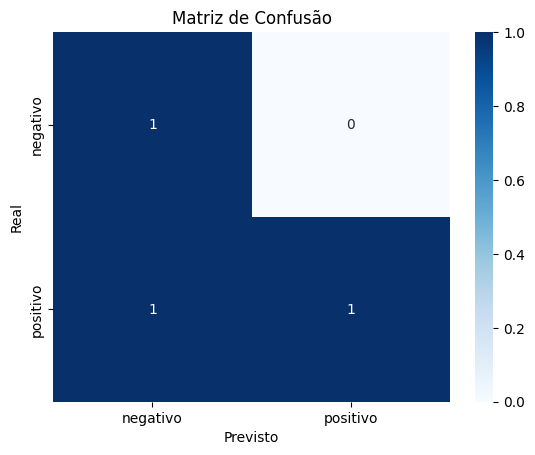

In [27]:
# Avalia o modelo no conjunto de teste
perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)
print(f"\nAcurácia do modelo no conjunto de teste: {acuracia * 100:.2f}%")
print(f"Perda do modelo no conjunto de teste: {perda:.4f}")

# Fazer previsões no conjunto de teste
y_pred_prob = modelo_lstm.predict(X_teste)
y_pred_classes = (y_pred_prob > 0.5).astype(int)  # Converter probabilidades para 0 ou 1

print("\n--- Relatório de Classificação ---")
print(classification_report(y_teste, y_pred_classes, target_names=['negativo', 'positivo']))

print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_teste, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negativo', 'positivo'],
            yticklabels=['negativo', 'positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [28]:
# Etapa 5: Testar o modelo com novas frases

# Utilizando o modelo treinado
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
    """
    Prevê o sentimento de uma nova frase.
    """
    # Converter a frase para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

    # Verificar se a frase tem apenas palavras desconhecidas
    if not sequencia_numerica or not sequencia_numerica[0]:
        print(f"Aviso: A frase '{frase_nova}' contém apenas palavras desconhecidas.")
        return "Desconhecido"

    sequencia_numerica = sequencia_numerica[0]  # Pega a primeira (e única) sequência

    # Padronizar o comprimento da sequência de entrada
    sequencia_padded = pad_sequences([sequencia_numerica], maxlen=max_seq_len, padding='post')

    # Fazer a previsão (probabilidade)
    probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0)[0][0]

    # Inverter o mapeamento para obter o nome do sentimento
    mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

    # Classificar com base no limiar de 0.5
    if probabilidade_positiva >= 0.5:
        return mapeamento_inverso[1]  # 'positivo'
    else:
        return mapeamento_inverso[0]  # 'negativo'


# Testar o modelo com novas frases
print("\n--- Testando o Modelo LSTM com Novas Frases ---")

frases = [
    "gostei muito do filme, excelente!",
    "odiei o livro, muito entediante",
    "a aula de pln é ótima",
    "o atendimento foi péssimo",
    "esse produto não vale a pena, é caro",
    "o filme é legal",
    "isso é horrível, que tristeza"
]

for i, frase in enumerate(frases, 1):
    sentimento = prever_sentimento(modelo_lstm, tokenizer, max_len, frase, mapeamento_sentimento)
    print(f"Frase {i}: '{frase}' -> Sentimento previsto: '{sentimento}'")



--- Testando o Modelo LSTM com Novas Frases ---
Frase 1: 'gostei muito do filme, excelente!' -> Sentimento previsto: 'positivo'
Frase 2: 'odiei o livro, muito entediante' -> Sentimento previsto: 'positivo'
Frase 3: 'a aula de pln é ótima' -> Sentimento previsto: 'positivo'
Frase 4: 'o atendimento foi péssimo' -> Sentimento previsto: 'negativo'
Frase 5: 'esse produto não vale a pena, é caro' -> Sentimento previsto: 'negativo'
Frase 6: 'o filme é legal' -> Sentimento previsto: 'negativo'
Frase 7: 'isso é horrível, que tristeza' -> Sentimento previsto: 'negativo'
